In [0]:
#without ddf_bool

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
%matplotlib notebook
%matplotlib inline
import sys
import os
from collections import Counter, OrderedDict
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
from astropy.table import Table

from tqdm import tnrange, tqdm_notebook
import sklearn 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import warnings
from itertools import chain
sns.set_style('whitegrid')
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)
#import cesium.featurize as featurize
#from gatspy.periodic import LombScargleMultiband, LombScargleMultibandFast
import pdb
import pickle
import csv

In [0]:
cd /gdrive/My\ Drive

/gdrive/My Drive


In [0]:
df = pd.read_csv('Features_train2.csv')
df

,Unnamed: 0,object_id,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_skew,flux_err_min,flux_err_max,flux_err_mean,flux_err_median,flux_err_std,flux_err_skew,detected_mean,flux_ratio_sq_sum,flux_ratio_sq_skew,flux_by_flux_ratio_sq_sum,flux_by_flux_ratio_sq_skew,flux_w_mean,flux_diff1,flux_diff2,flux_diff3,"0__fft_coefficient__coeff_0__attr_""abs""","0__fft_coefficient__coeff_1__attr_""abs""",0__kurtosis,0__skewness,"1__fft_coefficient__coeff_0__attr_""abs""","1__fft_coefficient__coeff_1__attr_""abs""",1__kurtosis,1__skewness,"2__fft_coefficient__coeff_0__attr_""abs""","2__fft_coefficient__coeff_1__attr_""abs""",2__kurtosis,2__skewness,"3__fft_coefficient__coeff_0__attr_""abs""","3__fft_coefficient__coeff_1__attr_""abs""",3__kurtosis,3__skewness,"4__fft_coefficient__coeff_0__attr_""abs""",...,__freq_signif_ratio_21___3_,__freq_signif_ratio_21___4_,__freq_signif_ratio_21___5_,__freq_signif_ratio_31___0_,__freq_signif_ratio_31___1_,__freq_signif_ratio_31___2_,__freq_signif_ratio_31___3_,__freq_signif_ratio_31___4_,__freq_signif_ratio_31___5_,__freq_varrat___0_,__freq_varrat___1_,__freq_varrat___2_,__freq_varrat___3_,__freq_varrat___4_,__freq_varrat___5_,__freq_y_offset___0_,__freq_y_offset___1_,__freq_y_offset___2_,__freq_y_offset___3_,__freq_y_offset___4_,__freq_y_offset___5_,time_score,phase_score,ddf_bool,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,0,615,-1100.440063,660.626343,-123.096998,-89.477524,394.109851,-0.349540,2.130510,12.845472,4.482743,3.835269,1.744747,1.623740,0.946023,2.929669e+06,0.812722,-9.601766e+08,-1.414322,-327.742307,1761.066406,-14.306331,-5.373326,205.036926,1628.427737,-1.475181,0.128917,22370.594834,2806.374162,-1.255123,0.415580,7780.500807,2805.598113,-1.409885,0.339918,7024.003068,2536.068846,-1.449858,0.293128,3245.366349,...,0.919127,0.936241,0.980085,0.750430,0.798199,0.734428,0.731502,0.628905,0.915124,0.127550,0.269031,0.139362,0.110785,0.129578,0.401664,4.173310e+00,-2.990840e+01,1.874790e+01,1.709080e+01,2.041200e+01,12.103300,0.197098,0.934001,1,92,1,0.000,0.000,0.000,0.0,0.0,0.000,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,1,713,-14.735178,14.770886,-1.423351,-0.873033,6.471144,0.014989,0.639458,9.115748,2.359620,1.998217,1.509888,1.633246,0.171429,5.886068e+03,3.439423,-2.875087e+04,-3.454554,-4.884564,29.506064,-20.730002,-6.040676,190.427851,299.586559,-1.014003,0.260052,57.109047,192.539229,-1.097170,-0.087865,44.477327,191.057528,-1.188472,-0.022678,55.270113,212.522263,-1.142896,-0.167176,50.414646,...,0.911566,0.942109,0.914162,0.834175,0.880634,0.801262,0.745575,0.866079,0.908687,0.113341,0.076214,0.086381,0.111883,0.166179,0.369518,5.357810e-01,-2.559080e-01,1.679860e-01,6.807870e-01,-2.183760e-01,0.177517,0.778523,-0.130853,1,88,1,1.817,45.703,0.000,0.0,0.0,0.000,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,2,730,-19.159811,47.310059,2.267434,0.409172,8.022239,3.177854,0.695106,11.281384,2.471061,1.990851,1.721134,1.823726,0.069697,4.124452e+03,5.480405,1.046502e+05,5.989138,25.373110,66.469870,29.315018,2.619697,3.461790,4.729538,0.474215,0.356910,7.334944,13.515895,0.976374,0.471342,124.845250,119.500254,5.131290,2.385066,168.280524,162.799417,7.125665,2.662075,219.745132,...,0.947548,1.026690,0.959602,0.969243,0.903630,0.820510,0.868992,0.920047,0.935167,0.758565,0.657343,0.204607,0.292954,0.318256,0.500549,-3.923360e-03,2.115860e-01,4.263530e+00,5.710620e+00,5.226490e+00,-0.328019,0.481251,0.419737,1,42,2,0.233,40.328,0.004,4.5,0.0,0.000,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,3,745,-15.494463,220.795212,8.909206,1.035895,27.558208,4.979826,0.567170,55.892746,2.555576,1.819875,3.537324,10.741655,0.173789,9.416165e+04,9.611274,1.439125e+07,11.141069,152.835617,236.289675,26.521968,1.546038,129.421659,123.298327,4.629801,2.023211,320.174052,280.440312,50.868880,7.007099,543.845781,491.548270,36.088137,5.688194,807.123762,710.721942,16.39

In [0]:
y = df['target']

In [0]:
object_id = df['object_id']

In [0]:
df = df.drop(columns=['target', 'Unnamed: 0', 'ddf_bool','object_id'])

In [0]:
normalized_df = (df-df.min())/(df.max()-df.min())

In [0]:
normalized_df

,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_skew,flux_err_min,flux_err_max,flux_err_mean,flux_err_median,flux_err_std,flux_err_skew,detected_mean,flux_ratio_sq_sum,flux_ratio_sq_skew,flux_by_flux_ratio_sq_sum,flux_by_flux_ratio_sq_skew,flux_w_mean,flux_diff1,flux_diff2,flux_diff3,"0__fft_coefficient__coeff_0__attr_""abs""","0__fft_coefficient__coeff_1__attr_""abs""",0__kurtosis,0__skewness,"1__fft_coefficient__coeff_0__attr_""abs""","1__fft_coefficient__coeff_1__attr_""abs""",1__kurtosis,1__skewness,"2__fft_coefficient__coeff_0__attr_""abs""","2__fft_coefficient__coeff_1__attr_""abs""",2__kurtosis,2__skewness,"3__fft_coefficient__coeff_0__attr_""abs""","3__fft_coefficient__coeff_1__attr_""abs""",3__kurtosis,3__skewness,"4__fft_coefficient__coeff_0__attr_""abs""","4__fft_coefficient__coeff_1__attr_""abs""",4__kurtosis,...,__freq_signif_ratio_21___2_,__freq_signif_ratio_21___3_,__freq_signif_ratio_21___4_,__freq_signif_ratio_21___5_,__freq_signif_ratio_31___0_,__freq_signif_ratio_31___1_,__freq_signif_ratio_31___2_,__freq_signif_ratio_31___3_,__freq_signif_ratio_31___4_,__freq_signif_ratio_31___5_,__freq_varrat___0_,__freq_varrat___1_,__freq_varrat___2_,__freq_varrat___3_,__freq_varrat___4_,__freq_varrat___5_,__freq_y_offset___0_,__freq_y_offset___1_,__freq_y_offset___2_,__freq_y_offset___3_,__freq_y_offset___4_,__freq_y_offset___5_,time_score,phase_score,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,0.998599,0.000580,0.253477,0.582881,0.001400,0.398073,0.005095,1.692928e-06,0.000022,0.000540,2.131387e-06,0.231565,0.945714,0.269740,0.102732,0.419864,0.457157,0.279084,0.000486,0.522296,0.539588,9.192374e-05,3.515728e-04,0.023115,0.486666,3.521680e-02,0.006315,0.048923,0.520752,2.079607e-03,0.001155,0.016812,0.522493,2.151205e-03,0.001181,0.011624,0.514756,0.000885,0.001043,0.006630,...,0.450552,0.631785,0.597880,0.626320,0.228374,0.337524,0.424850,0.434345,0.278001,0.539139,0.127418,0.268992,0.139321,0.110750,0.129510,0.401857,0.273375,0.396428,0.999929,0.496892,0.609820,0.492746,0.437672,0.959545,0.966292,0.0,0.000000,0.000000,0.793282,0.481390,0.0,0.000000,0.453353,0.001380,0.016690,0.020350,0.017798,0.020112,0.017101,0.015200
1,0.999543,0.000315,0.254123,0.584075,0.000014,0.409715,0.000537,2.344565e-08,0.000002,0.000063,1.480084e-06,0.232165,0.166694,0.000530,0.234246,0.423389,0.402260,0.280379,0.000002,0.522246,0.539480,8.537387e-05,6.464922e-05,0.029284,0.494760,8.990194e-05,0.000433,0.051468,0.487141,1.188290e-05,0.000079,0.020477,0.498674,1.692199e-05,0.000099,0.016752,0.484139,0.000014,0.000077,0.012611,...,0.439772,0.624041,0.604519,0.530395,0.290221,0.392311,0.484569,0.449170,0.554486,0.529920,0.113206,0.076164,0.086336,0.111848,0.166125,0.369672,0.228406,0.476676,0.999922,0.463559,0.552805,0.438561,0.851534,0.182289,0.921348,0.0,0.527737,0.964483,0.793282,0.481390,0.0,0.000000,0.453353,0.000680,0.003743,0.000729,0.000664,0.000990,0.000886,0.000806
2,0.999539,0.000328,0.254143,0.584092,0.000019,0.510730,0.000707,9.928179e-07,0.000003,0.000061,2.065903e-06,0.244197,0.064381,0.000368,0.336435,0.423389,0.656362,0.280500,0.000013,0.522639,0.540883,1.549061e-06,9.836503e-07,0.049192,0.500738,1.154530e-05,0.000030,0.084877,0.524475,3.336405e-05,0.000049,0.125095,0.656837,5.153318e-05,0.000075,0.154875,0.672325,0.000060,0.000076,0.134063,...,0.528993,0.660896,0.700214,0.596515,0.389972,0.407594,0.501768,0.579188,0.617399,0.567847,0.758571,0.657327,0.204572,0.292940,0.318262,0.500862,0.221734,0.477941,0.999924,0.473776,0.567853,0.436264,0.639934,0.584175,0.404494,0.5,0.067674,0.851053,0.803618,0.483366,0.0,0.000000,0.747074,0.000180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.999542,0.000400,0.254178,0.584101,0.000089,0.568282,0.000316,2.096156e-05,0.000003,0.000017,7.102504e-06,0.807492,0.169068,0.008658,0.543261,0.423442,0.794985,0.281012,0.000060,0.522617,0.540709,5.802221e-05,2.658504e

In [0]:
np.any(np.isinf(normalized_df)), np.any(np.isnan(normalized_df))
#np.any(np.isinf(df)), np.any(np.isnan(df))

(False, True)

In [0]:
normalized_df =normalized_df.replace([np.nan], 0)
#df = df.fillna(df.mean())

In [0]:
 np.any(np.isnan(normalized_df))

False

In [0]:
X = normalized_df

In [0]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

In [0]:
class_map =[] 

for i,val in enumerate(y.unique()):
    class_map.append([val , i])
class_map

[[92, 0],
 [88, 1],
 [42, 2],
 [90, 3],
 [65, 4],
 [16, 5],
 [67, 6],
 [95, 7],
 [62, 8],
 [15, 9],
 [52, 10],
 [6, 11],
 [64, 12],
 [53, 13]]

In [0]:
##def one_hot(targets , class_map):
    
    vecs = []
    
    for j in targets:
        
        vec = np.zeros(14)
        
        for i in range(len(class_map)):
            if class_map[i][0]== j:
                vec[class_map[i][1]] =+ 1
                vecs.append(vec)
    return vecs

In [0]:
#new_y = one_hot(y, class_map)
new_y

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [0]:
from sklearn.ensemble import RandomForestClassifier as rf
model=RandomForestClassifier()
Classifier = rf(n_estimators=1000,min_samples_leaf=1, random_state=42)
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

In [0]:
classifier = model.fit(X_train,y_train)
predictions = model.predict_proba(X_test)
np.savetxt('./predictions.csv',predictions,delimiter=',')
predictions

array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.8, 0. , 0. ],
       [0. , 0.1, 0. , ..., 0. , 0. , 0. ]])

In [0]:
np.genfromtxt('./predictions.csv', delimiter=',')

array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.8, 0. , 0. ],
       [0. , 0.1, 0. , ..., 0. , 0. , 0. ]])

0.9980891719745223

In [0]:
#saving model
filename = 'RandomForest_model.sav'
pickle.dump(model, open('./RF_model/2', 'wb'))

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
u = confusion_matrix(y_test,y_pred)

[[ 32   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  96   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0 198   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 221   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0  36   4   0   0   0   0   0   0   6   0   0]
 [  1   0   0   0   0  10   0   0   0   0   0   0   0   0]
 [  0   0   0  19   1   0  65   0   0   4   0   0   0   0]
 [  0   1   0   0   0   0   0  17   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 195   0   0   0   0   0]
 [  0   0   0  10   0   0   0   0   0  18   0   4   0   0]
 [  0   0   0   0   0   0   0   0   0   0  73   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 471   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  43   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  43]]
              precision    recall  f1-score   support

           6       0.97      1.00      0.98        32
          15       0.99      0.99      0.99        97
          

In [0]:
def conf_plotter(y_true, y_pred, classes,
                      normalize=0,
                      title=None,
                      cmap=plt.cm.pink_r,
                      mode = 'train',
                      save = 0,
                      name = 'conf.jpg'):

    if not title:
        if mode == 'train':
            title = 'Normalized confusion matrix on train dataset'
        else:
            title = 'Normalized confusion matrix on test dataset'
            

    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax ,fraction=0.046, pad=0.04)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           xlabel='Predicted label',
           ylabel='True label')
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
                    
        item.set_fontsize(20)
     
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        
        item.set_fontsize(12)

        
                
    plt.gca().invert_yaxis()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if save == 1:
        plt.savefig(name)
    return ax

In [0]:
classes = y.unique()

In [0]:
classes = sorted(classes, key=int) 

In [0]:
y_true = pd.DataFrame(y_test)
y_prediction = pd.DataFrame(y_pred)
y_prediction.shape, y_true.shape

((2355, 1), (2355, 1))

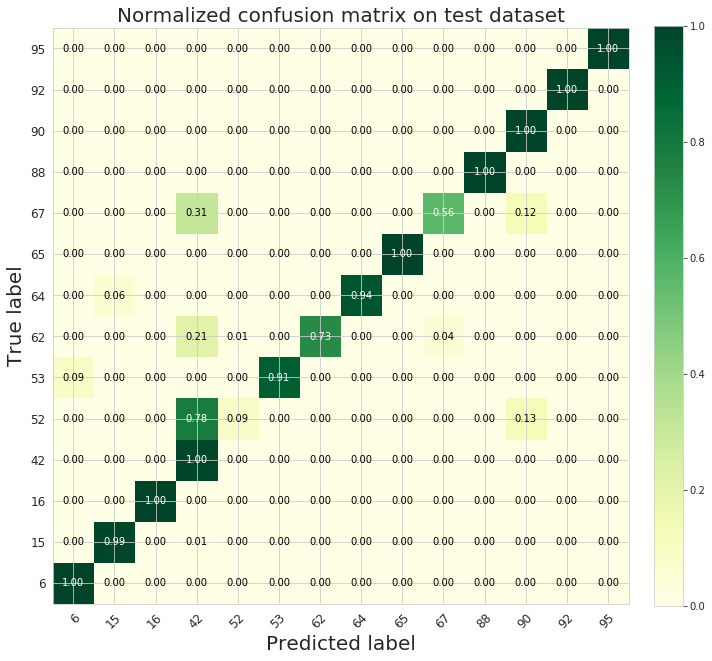

In [0]:
conf_plotter(y_test, y_pred, classes,
                      normalize=1,
                      title=None,
                      cmap=plt.cm.YlGn,
                      mode = 'test',
                      save = 1,
                      name = 'conf_RF.jpg')


In [0]:
def accuracy(confusion_matrix):
    diagonal_sum = np.trace(u)
    sum_of_all_elements = np.sum(u)
    return diagonal_sum / sum_of_all_elements 


In [0]:
accuracy(confusion_matrix)

0.9464968152866242

In [0]:
y_pred

array([90, 16, 90, ..., 65, 65, 42])

In [0]:
y_predict = one_hot(y_pred, class_map)
y_predict

[array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.

In [0]:
def multi_weighted_logloss(y_ohe, y_p):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1-1e-15)
    # Transform to log
    y_p_log = np.log(y_p)
    # Get the log for ones, .values is used to drop the index of DataFrames
    # Exclude class 99 for now, since there is no class99 in the training set 
    # we gave a special process for that class
    y_log_ones = np.sum(y_ohe * y_p_log, axis=0)
    # Get the number of positives for each class
    nb_pos = y_ohe.sum(axis=0).astype(float)
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    y_w = y_log_ones * class_arr / nb_pos    
    loss = - np.sum(y_w) / np.sum(class_arr)
    return loss

In [0]:
#y_true

,target
4325,90
2166,16
4270,90
1905,90
1454,52
3307,62
4847,42
2464,6
7714,65
6263,90


In [0]:
##y_true2 = one_hot(y_true['target'], class_map)
y_true2 = pd.DataFrame(y_true2)
y_true2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
multi_weighted_logloss(y_true2, predictions) 

32.54540449047589